In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

data = pd.read_csv("salary_prediction_data.csv")

print(data.head)

<bound method NDFrame.head of        Education  Experience  Location Job_Title  Age  Gender         Salary
0    High School           8     Urban   Manager   63    Male   84620.053665
1            PhD          11  Suburban  Director   59    Male  142591.255894
2       Bachelor          28  Suburban   Manager   61  Female   97800.255404
3    High School          29     Rural  Director   45    Male   96834.671282
4            PhD          25     Urban   Analyst   26  Female  132157.786175
..           ...         ...       ...       ...  ...     ...            ...
995  High School           8  Suburban   Analyst   25  Female   64683.389864
996  High School          24     Urban  Engineer   30  Female   74468.205020
997       Master          18     Rural   Analyst   44    Male   98207.026024
998     Bachelor          27  Suburban  Director   31  Female  108544.922720
999  High School          25     Urban  Director   41  Female   71077.000066

[1000 rows x 7 columns]>


In [24]:
def draw_boxplot_for_feature(feature_name: str, axs=plt):
    feature_col = data[feature_name]
    salary_col = data['Salary']
    unique_feature_values = feature_col.unique()
    data_to_display = []
    for value in unique_feature_values:
        data_to_display.append(salary_col[feature_col == value])
    axs.set_title(feature_name)
    axs.set_ylabel('Salary')
    axs.boxplot(data_to_display, tick_labels=unique_feature_values)

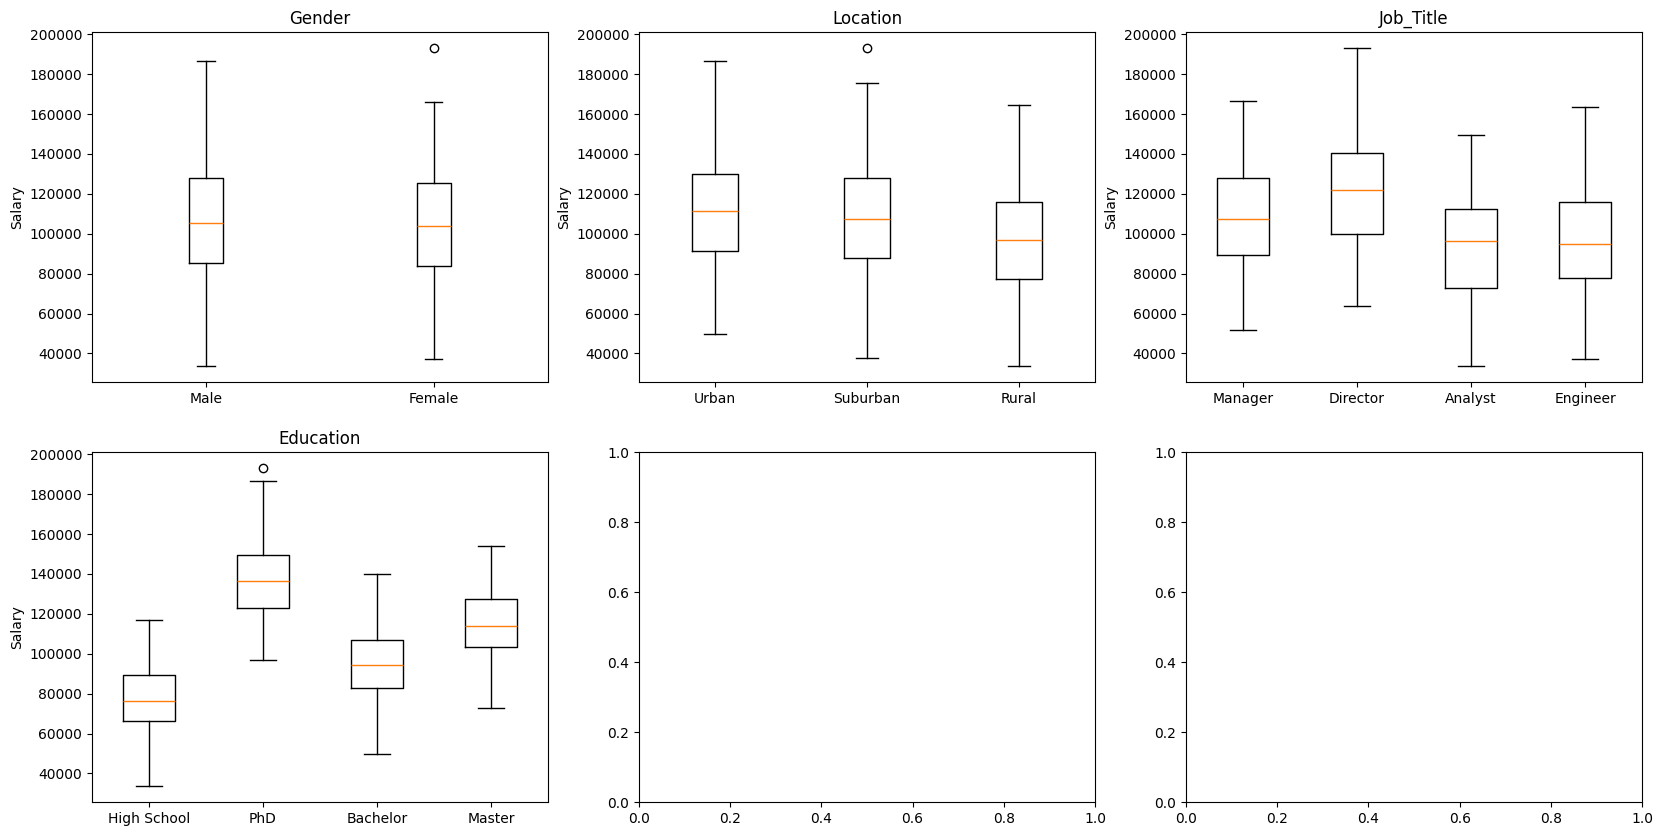

In [25]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))

draw_boxplot_for_feature('Gender', axs[0][0])
draw_boxplot_for_feature('Location', axs[0][1])
draw_boxplot_for_feature('Job_Title', axs[0][2])
draw_boxplot_for_feature('Education', axs[1][0])

In [55]:
def draw_bar_chart(feature_name, rng=5, max_value=100, axs=plt):
    intervals = []
    for i in range(int(max_value / rng)):
        intervals.append((i * rng, (i + 1) * rng))
    salary_col = data['Salary']
    feature_col = data[feature_name]
    data_to_display = []
    labels = []
    for interval in intervals:
        idx = np.logical_and(interval[0] < feature_col, feature_col <= interval[1])
        salary = salary_col[idx]
        mean = np.mean(salary)
        data_to_display.append(np.float64(0) if math.isnan(mean) else mean)
        labels.append(f"{interval[0]} - {interval[1]}")
    axs.bar(labels, data_to_display)
    axs.set_ylabel('Mean Salary')
    axs.set_xlabel('Age Range')

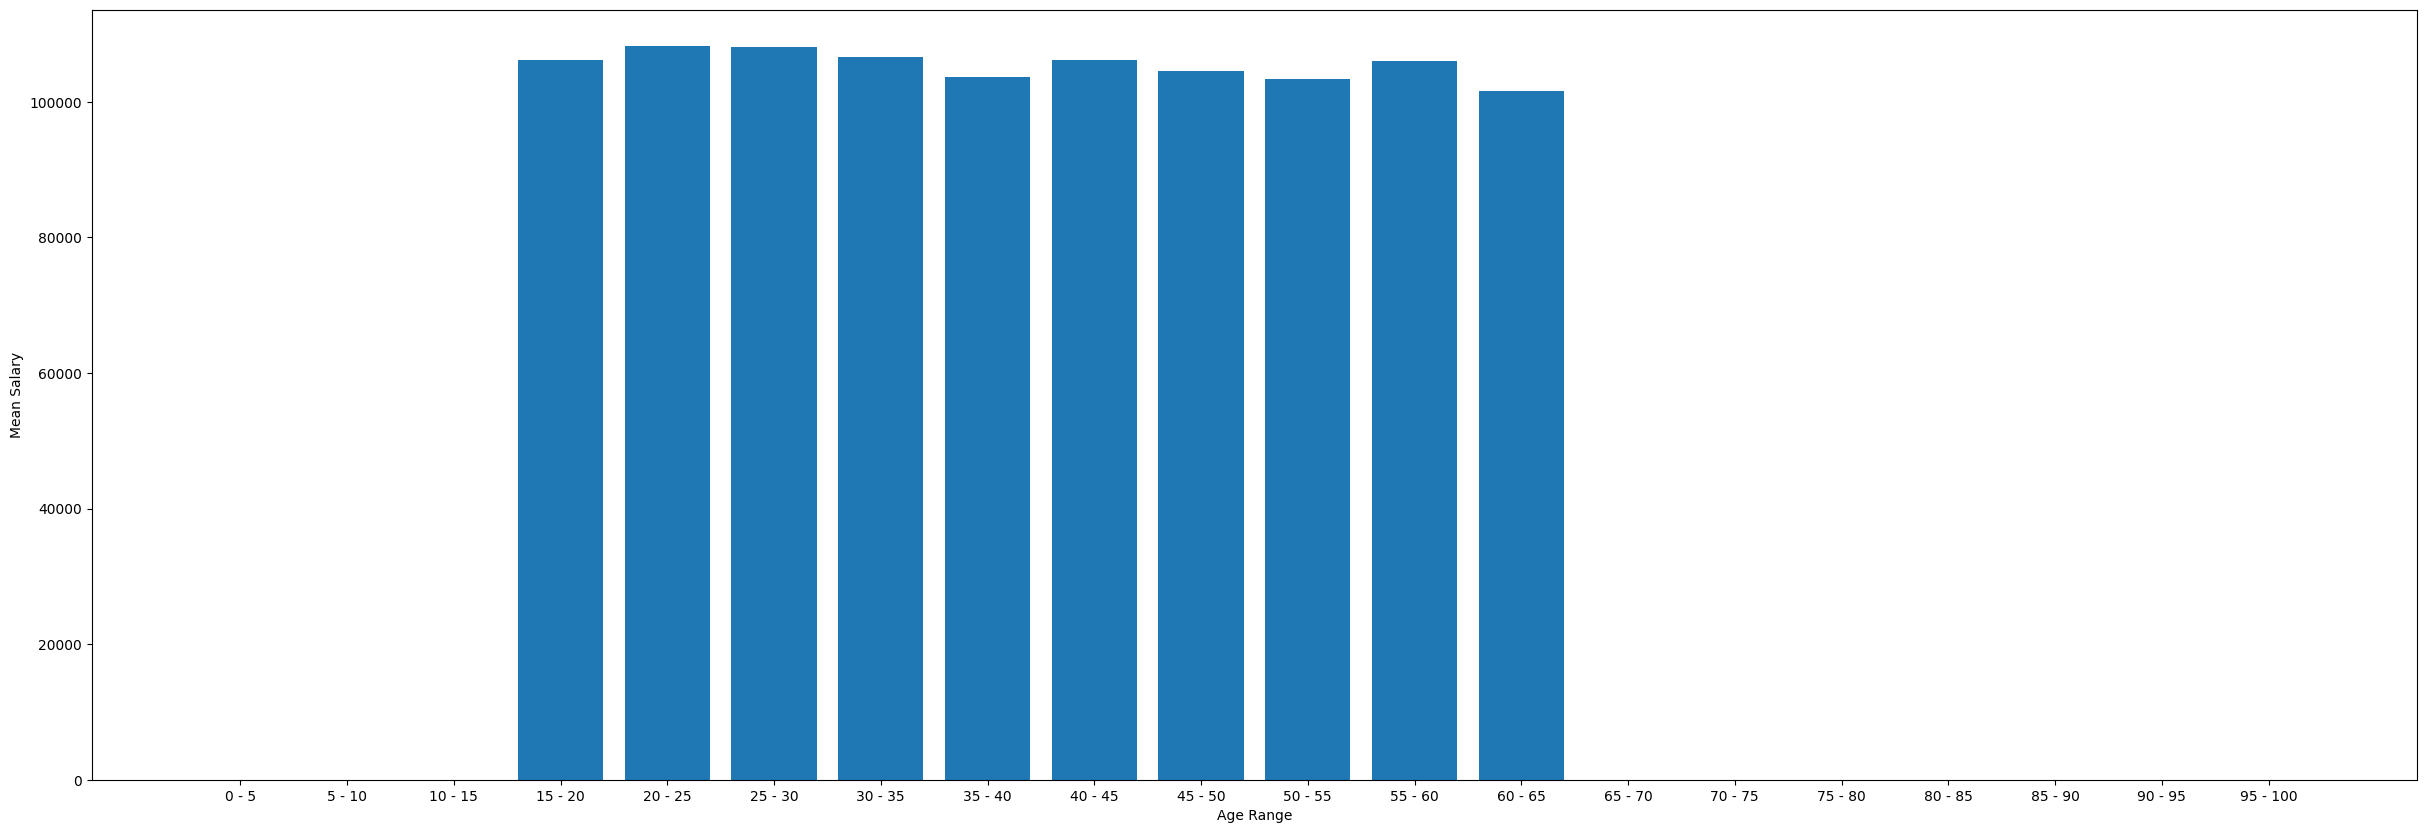

In [56]:
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(30, 10))
draw_bar_chart('Age', axs=axs)

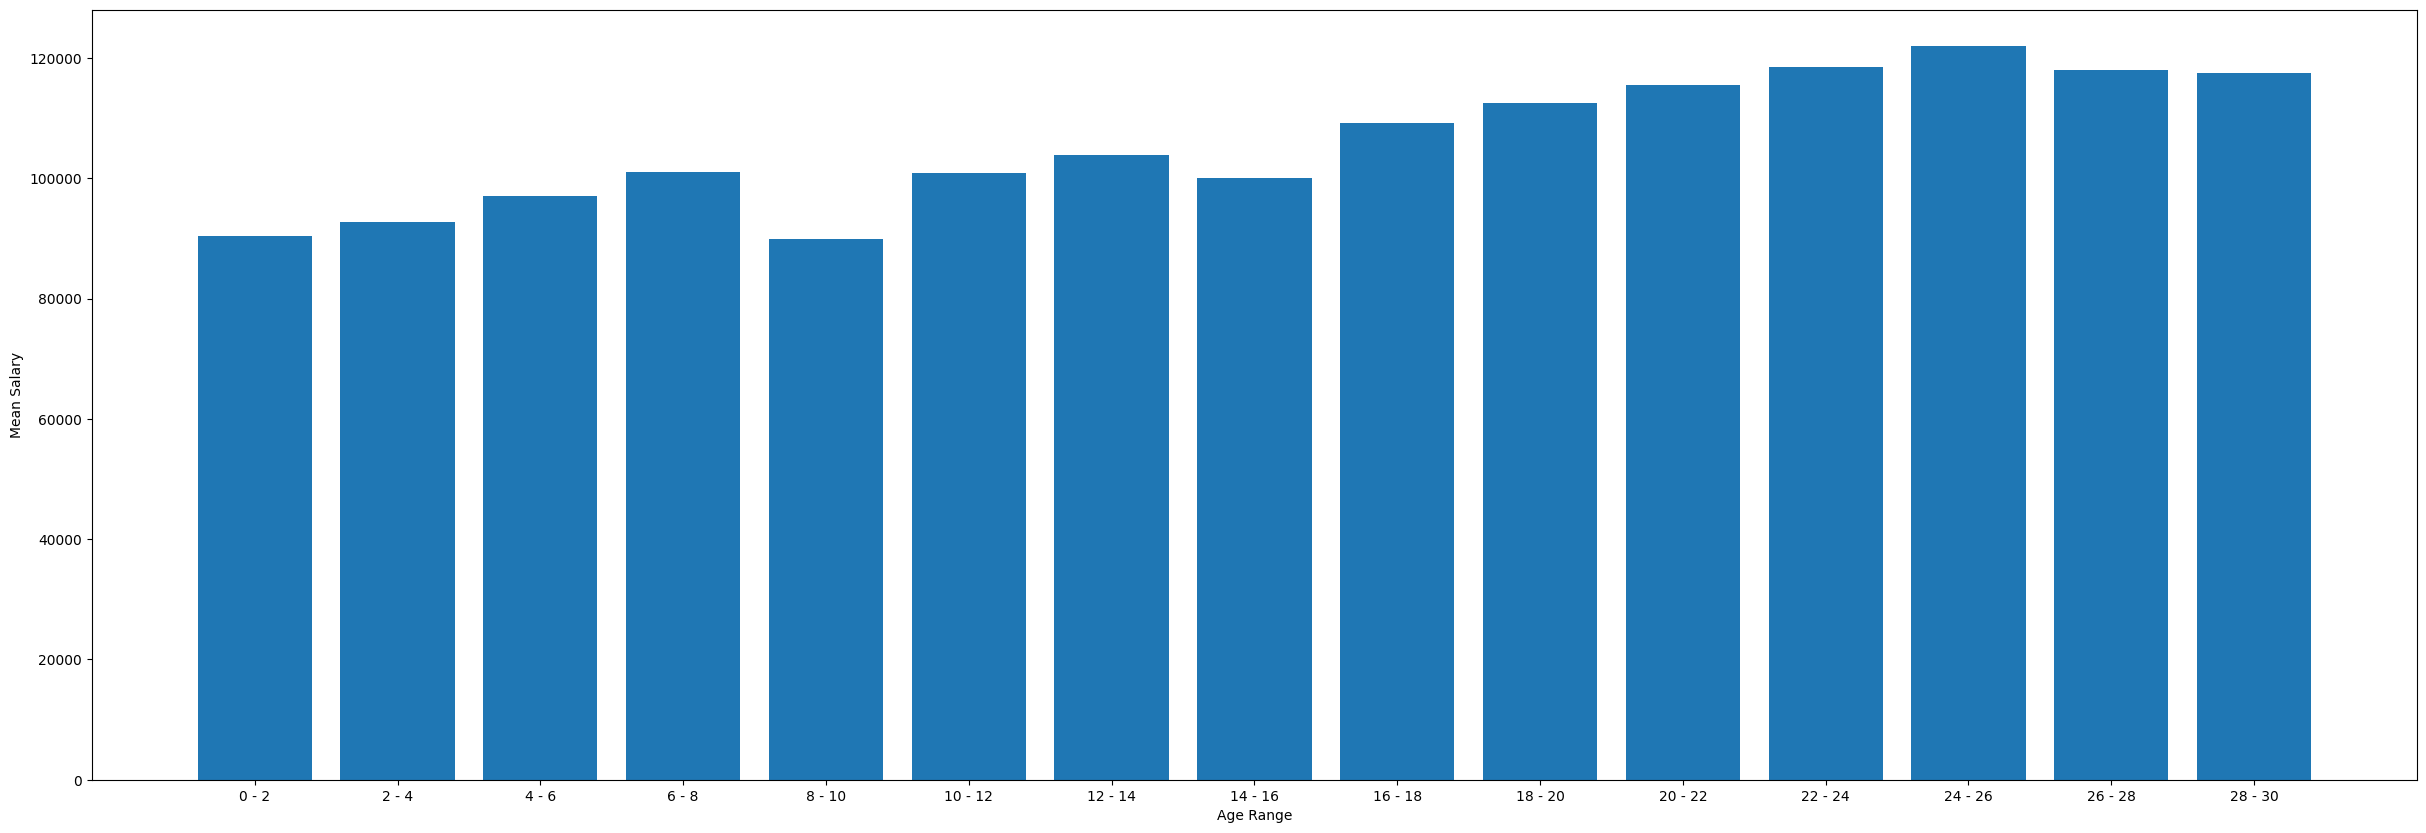

In [58]:
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(30, 10))
draw_bar_chart('Experience', rng=2, max_value=30, axs=axs)

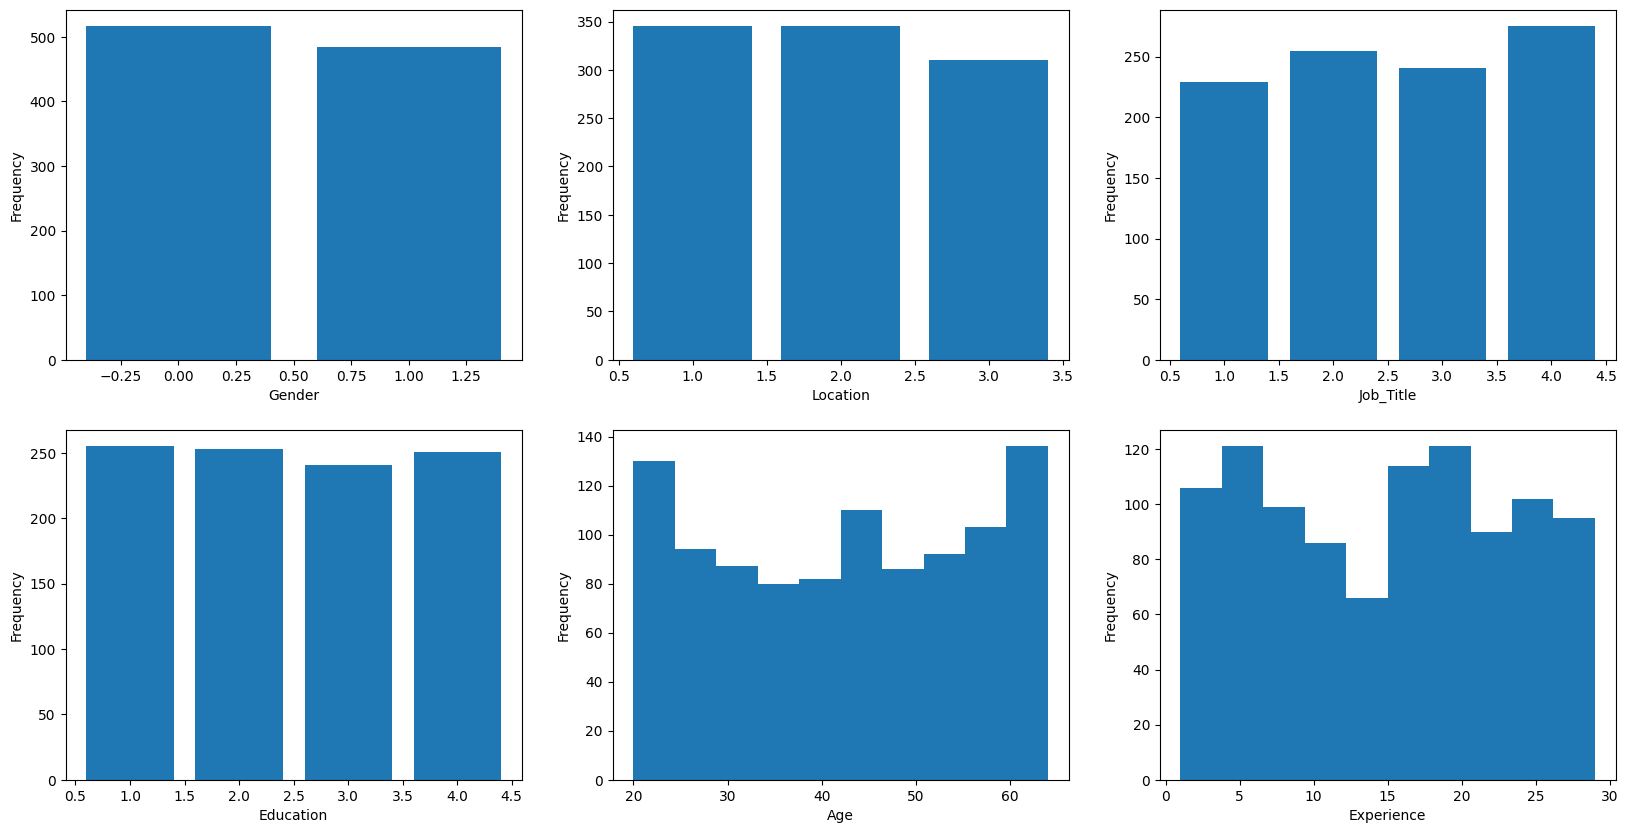

In [59]:
def draw_distribution(feature_name, plt=plt):
    feature_col = data[feature_name]
    unique_feature_values, counts = np.unique(feature_col, return_counts=True)
    if (feature_name == 'Age' or feature_name == 'Experience'):
        plt.hist(feature_col.astype(int))
    elif (feature_name == 'Salary'):
        plt.hist(feature_col.astype(float))
    else:
        plt.bar(unique_feature_values, counts)
    plt.set_xlabel(feature_name)
    plt.set_ylabel('Frequency')

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))

draw_distribution('Gender', axs[0][0])
draw_distribution('Location', axs[0][1])
draw_distribution('Job_Title', axs[0][2])
draw_distribution('Education', axs[1][0])
draw_distribution('Age', axs[1][1])
draw_distribution('Experience', axs[1][2])

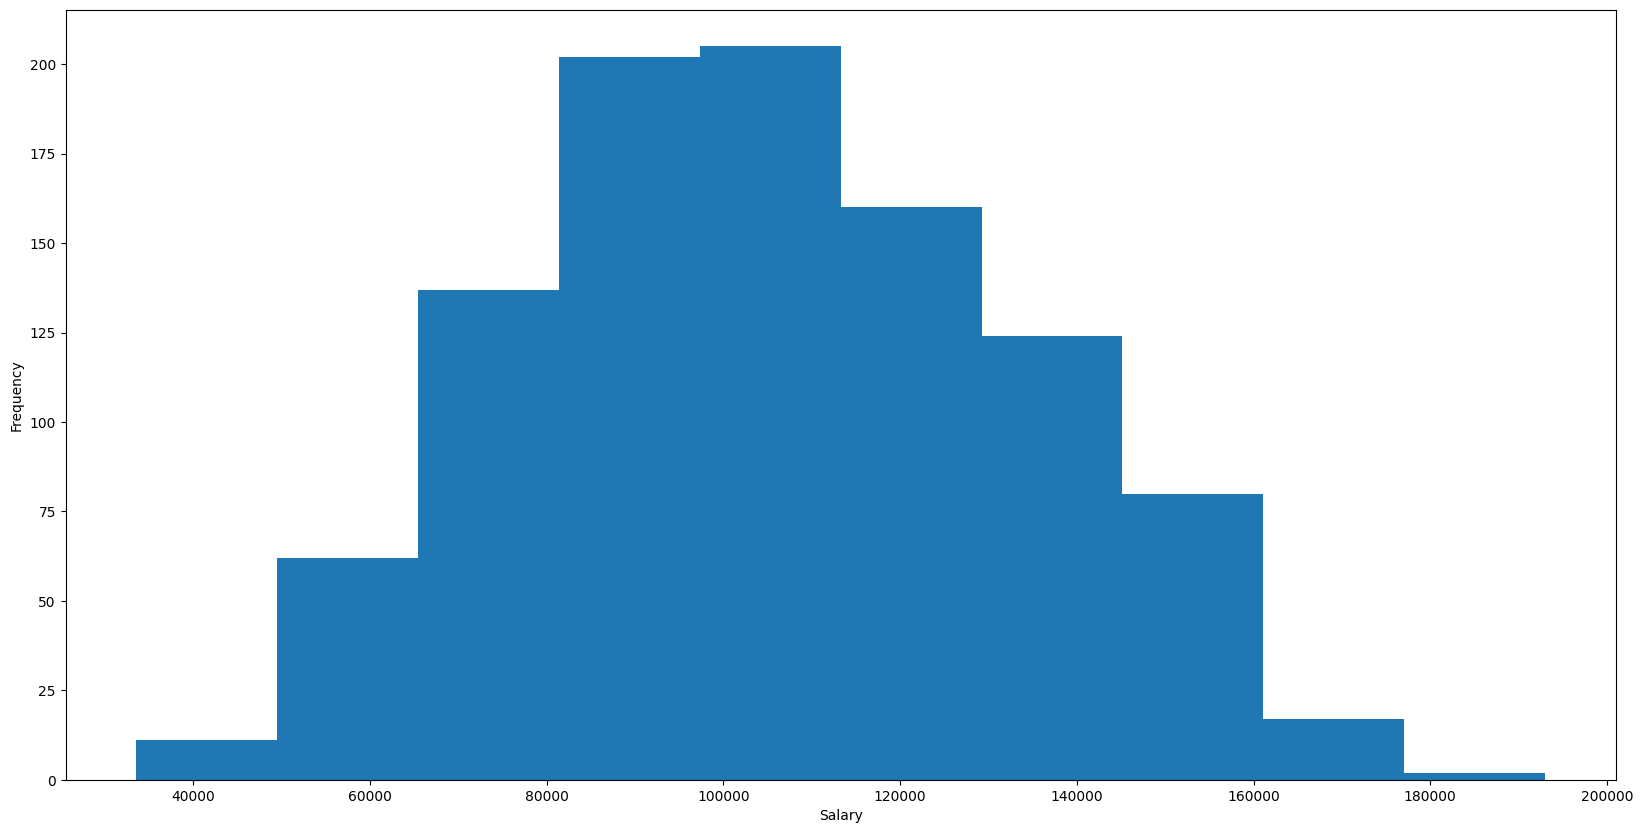

In [29]:
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(20, 10))
draw_distribution('Salary', axs)

In [38]:
data = pd.read_csv("salary_prediction_data.csv")
data['Gender'] = data['Gender'].replace({'Male': 0, 'Female': 1})
data['Education'] = data['Education'].replace({'High School': 1, 'Bachelor': 2, 'Master': 3, 'PhD': 4})
data['Location'] = data['Location'].replace({'Rural': 1, 'Suburban': 2, 'Urban': 3})
data['Job_Title'] = data['Job_Title'].replace({'Engineer': 1, 'Manager': 3, 'Analyst': 2, 'Director': 4})
print(data.corr())

            Education  Experience  Location  Job_Title       Age    Gender  \
Education    1.000000    0.021650  0.014401   0.044312 -0.070744 -0.030625   
Experience   0.021650    1.000000  0.096275  -0.007851  0.044296  0.020602   
Location     0.014401    0.096275  1.000000  -0.021347 -0.006347 -0.044695   
Job_Title    0.044312   -0.007851 -0.021347   1.000000 -0.013646 -0.001801   
Age         -0.070744    0.044296 -0.006347  -0.013646  1.000000 -0.049055   
Gender      -0.030625    0.020602 -0.044695  -0.001801 -0.049055  1.000000   
Salary       0.791505    0.341918  0.177018   0.345469 -0.053174 -0.028173   

              Salary  
Education   0.791505  
Experience  0.341918  
Location    0.177018  
Job_Title   0.345469  
Age        -0.053174  
Gender     -0.028173  
Salary      1.000000  


/var/folders/yg/gh9fk4pn2pl2d7ktbqx83rvr0000gp/T/ipykernel_67171/660273850.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Gender'] = data['Gender'].replace({'Male': 0, 'Female': 1})
/var/folders/yg/gh9fk4pn2pl2d7ktbqx83rvr0000gp/T/ipykernel_67171/660273850.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Education'] = data['Education'].replace({'High School': 1, 'Bachelor': 2, 'Master': 3, 'PhD': 4})
/var/folders/yg/gh9fk4pn2pl2d7ktbqx83rvr0000gp/T/ipykernel_67171/660273850.py:4: FutureWarning: Downcasting beha